### Multiclass Classification

##### This analysis is a multiclass classification because the target variable encompasses more than two categories, unlike the more common binary classification, which involves only two categories.

In [1]:
import pandas as pd
import os
import pyxlsx
import pyxlsb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
import joblib
import os

In [2]:
# Load the dataset
df = pd.read_excel("train.xlsx")
df.head(10)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33
5,-63,-68,-63,-66,-68,-54,-60,-53,-50,-56,-68,-72,-59,-57,-58,-52,-48,-52,A75
6,-68,-69,-65,-70,-56,-51,-63,-69,-71,-66,-65,-62,-54,-56,-54,-68,-61,-65,A41
7,-61,-65,-53,-59,-66,-68,-75,-70,-66,-53,-64,-64,-70,-69,-79,-78,-78,-75,B14
8,-82,-73,-68,-79,-69,-69,-62,-49,-56,-83,-73,-79,-68,-64,-67,-58,-57,-55,B80
9,-65,-74,-63,-54,-60,-55,-70,-82,-72,-59,-64,-54,-61,-66,-61,-71,-72,-79,A33


In [3]:
df.shape

(36752, 19)

In [4]:
df['target'].unique()

array(['B37', 'B61', 'A19', 'A22', 'A33', 'A75', 'A41', 'B14', 'B80',
       'B64', 'A1', 'B21', 'A70', 'B57', 'B9', 'B50', 'B31', 'A21', 'B30',
       'A4', 'B40', 'B6', 'A64', 'A25', 'B18', 'A66', 'A53', 'B73', 'A50',
       'B25', 'A29', 'A35', 'A3', 'A46', 'B45', 'A36', 'B5', 'A79', 'A32',
       'B23', 'A7', 'A62', 'A71', 'A58', 'A9', 'B63', 'B51', 'B8', 'B36',
       'A14', 'A15', 'A24', 'B38', 'A10', 'B4', 'A37', 'A12', 'B41',
       'A17', 'B49', 'B71', 'B59', 'B39', 'B29', 'A76', 'B58', 'B28',
       'A77', 'A67', 'B24', 'A31', 'A34', 'A5', 'B34', 'A11', 'B16',
       'B20', 'A63', 'B53', 'A73', 'A44', 'A69', 'A56', 'A54', 'A55',
       'B11', 'A42', 'B22', 'B67', 'A74', 'A57', 'A8', 'B46', 'B15',
       'A51', 'A40', 'A59', 'A72', 'B32', 'A2', 'A13', 'B17', 'A65',
       'A52', 'A47', 'B47', 'B77', 'B3', 'B35', 'B44', 'A80', 'B43',
       'B54', 'B75', 'A49', 'B52', 'B33', 'B2', 'B1', 'A39', 'B7', 'A20',
       'A18', 'B12', 'A27', 'A6', 'A68', 'B72', 'B66', 'B69', 'A26',
   

In [5]:
df['target'].value_counts()

target
A39    635
A33    633
A29    432
A3     429
B45    428
      ... 
A27    191
B65    191
A69    190
A18    189
A9     188
Name: count, Length: 160, dtype: int64

In [6]:
df.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
count,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000
mean,-65.865449,-64.521931,-64.574472,-65.296474,-64.462152,-63.318731,-67.030202,-66.591260,-65.692479,-65.555181,-65.681922,-66.244204,-63.962614,-64.399080,-64.550011,-64.136782,-65.910726,-66.590417
std,8.737286,8.914559,8.154517,8.142803,8.068375,8.651501,9.257529,10.160193,10.598247,10.408147,9.453958,8.866239,8.254217,9.562839,9.207343,10.540542,10.071973,10.600992
min,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000
25%,-72.000000,-70.000000,-70.000000,-70.000000,-69.000000,-69.000000,-74.000000,-75.000000,-73.000000,-73.000000,-71.000000,-72.000000,-69.000000,-70.000000,-70.000000,-71.000000,-72.000000,-74.000000
50%,-66.000000,-65.000000,-64.000000,-66.000000,-65.000000,-63.000000,-66.000000,-66.000000,-65.000000,-65.000000,-65.000000,-66.000000,-63.000000,-64.000000,-65.000000,-63.000000,-65.000000,-66.000000
75%,-61.000000,-59.000000,-59.000000,-61.000000,-59.000000,-57.000000,-60.000000,-59.000000,-58.000000,-58.000000,-59.000000,-61.000000,-58.000000,-58.000000,-58.000000,-57.000000,-59.000000,-59.000000
max,-41.000000,-37.000000,-41.000000,-39.000000,-36.000000,-39.000000,-45.000000,-39.000000,-39.000000,-37.000000,-40.000000,-43.000000,-43.000000,-39.000000,-38.000000,-40.000000,-43.000000,-39.000000


In [7]:
df.isna().sum()

T1        0
T2        0
T3        0
T4        0
T5        0
T6        0
T7        0
T8        0
T9        0
T10       0
T11       0
T12       0
T13       0
T14       0
T15       0
T16       0
T17       0
T18       0
target    0
dtype: int64

<Figure size 800x700 with 0 Axes>

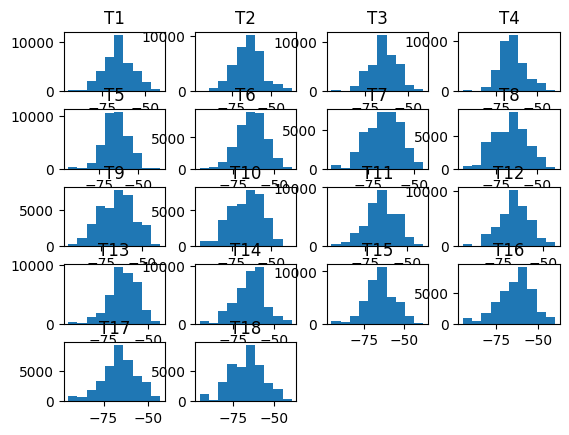

In [8]:
# Use histplot to show the data distribution
plt.figure(figsize=(8,7))
df.hist(grid=False)
plt.show()

#### Key Insight
###### All the features seem to be normally distributed

In [9]:
# Group the columns into numericala and categorical columns
num_cols = df.select_dtypes(include=('number')).columns
num_cols

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11',
       'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18'],
      dtype='object')

In [10]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['target'], dtype='object')

In [11]:
# Use X as independent features
X = df.drop(['target'], axis=1)

In [12]:
# Use y as target 
y = df['target']

In [13]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42,stratify=y)

In [14]:
# Encode the label
label = LabelEncoder()
y_train_encod = label.fit_transform(y_train)
y_test_encod = label.transform(y_test)


In [15]:
# Create a randomforestclassifier
rd_classifier = RandomForestClassifier(random_state=42)

In [16]:
# Create onevsrest classifier with the randomforestclassifier
onevsrest_classifier = OneVsRestClassifier(rd_classifier)

In [17]:
# To train the multiclass classifier
onevsrest_classifier.fit(X_train,y_train_encod)

OneVsRestClassifier(estimator=RandomForestClassifier(random_state=42))

In [18]:
# Make prediction on the test set 
y_predict = onevsrest_classifier.predict(X_test)

In [19]:
# To evaluate the metric
accuracy = accuracy_score(y_predict, y_test_encod)
print(f"Accuracy Score is : {accuracy *100:.2f}%")

Accuracy Score is : 98.97%


#### Model Testing

In [20]:
# Load the test dataset

test_df = pd.read_excel("test.xlsx")
test_df.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57


In [21]:
# To predict using the test dataset
test_prediction = onevsrest_classifier.predict(test_df)

In [22]:
# To inverse transform the encoded target column
prediction = label.inverse_transform(test_prediction)

In [23]:
# Create a column for the predicted target in the test dataset
test_df['predicted target'] = prediction

In [24]:
test_df.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,predicted target
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60,B74
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80,A10
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70,B65
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65,B20
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57,A67


### Model Persistence

In [25]:


if not os.path.exists(".\models"):
    os.makedir(".\models")

joblib.dump(onevsrest_classifier,".\models\multiclass_model.joblib")

['.\\models\\multiclass_model.joblib']

In [26]:
joblib.dump(label,".\models\encoder.joblib")

['.\\models\\encoder.joblib']